# Imports utilized

In [5]:
import matplotlib.pyplot as plt
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
 

import pandas as pd
import geopandas as gpd
import maup
from maup.smart_repair import smart_repair

# Vest Shape File

### This file will provide the information regarding 2020 presidential election by precincts

In [6]:
precincts_df = gpd.read_file('./in_vest_20/in_vest_20.shp')

### Information inside this shapefile:

In [7]:
precincts_df

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20GOVRHOL,G20GOVDMYE,G20GOVLRAI,G20ATGRROK,G20ATGDWEI,geometry
0,18,123,000200,18123000200,TROY TOWNSHIP 01,538,367,12,580,277,53,487,402,"POLYGON ((-86.80477 37.99381, -86.80435 37.993..."
1,18,123,000190,18123000190,TROY,91,59,4,90,49,12,81,65,"POLYGON ((-86.81450 37.99871, -86.81355 37.998..."
2,18,123,000140,18123000140,TELL CITY 05,263,203,10,275,171,27,232,228,"POLYGON ((-86.77842 37.95835, -86.77832 37.958..."
3,18,123,000160,18123000160,TELL CITY 07,207,185,9,219,158,21,182,207,"POLYGON ((-86.78400 37.97424, -86.78236 37.974..."
4,18,123,000010,18123000010,ANDERSON,531,263,14,565,192,51,440,347,"POLYGON ((-86.80715 38.11784, -86.80709 38.117..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,18,057,000500,18057000500,DELAWARE 16,339,463,17,436,327,54,377,421,"POLYGON ((-86.04902 39.94159, -86.04978 39.940..."
5162,18,057,000110,18057000110,BRIAR CREEK,298,293,11,369,189,48,345,244,"POLYGON ((-86.11229 39.92690, -86.11229 39.926..."
5163,18,057,000080,18057000080,BLUE CREEK,325,409,19,441,258,48,384,343,"POLYGON ((-86.09824 39.94130, -86.09824 39.940..."
5164,18,057,000850,18057000850,FALL CREEK 21,598,480,17,762,282,58,667,403,"POLYGON ((-85.93651 39.92741, -85.93759 39.927..."


### Read the rest of the files

vap_Blocks_df carries data(from the census) of the voting age population<br>
tot_Blocks_df carries data of the total population in blocks<br>
cong_df is the shapefile of the congressional districts<br>

In [8]:
vap_Blocks_df = gpd.read_file('./in_pl2020_b/in_pl2020_p3_b.shp')
tot_Blocks_df = gpd.read_file('./in_pl2020_b/in_pl2020_p2_b.shp')
cong_df = gpd.read_file('./in_cong_adopted_2021/Congressional2021AdoptedOCT012021.shp')

In [9]:
vap_Blocks_df

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,P0030001,P0030002,P0030003,P0030004,P0030005,...,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,geometry
0,180390016023026,750,0154282,7500000US180390016023026,039,8,8,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.98092 41.73830, -85.98087 41.738..."
1,180390020023021,750,0155080,7500000US180390020023021,039,23,18,14,2,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.89284 41.62477, -85.89266 41.625..."
2,180390021022020,750,0155221,7500000US180390021022020,039,25,20,13,1,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.95934 41.66548, -85.95910 41.665..."
3,181319589001013,750,0266077,7500000US181319589001013,131,23,23,23,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-86.56339 41.15959, -86.56337 41.161..."
4,181499537002016,750,0285813,7500000US181499537002016,149,3,3,1,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-86.67847 41.38992, -86.67844 41.393..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204563,181670009002070,750,0301387,7500000US181670009002070,167,11,10,10,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.41549 39.48547, -87.41549 39.485..."
204564,181670003002034,750,0300551,7500000US181670003002034,167,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.40779 39.48166, -87.40752 39.481..."
204565,181670105003027,750,0303995,7500000US181670105003027,167,16,15,15,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.44603 39.46517, -87.44532 39.465..."
204566,181670003002040,750,0300557,7500000US181670003002040,167,3,3,1,2,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.41060 39.48064, -87.41029 39.480..."


In [10]:
tot_Blocks_df

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,P0020001,P0020002,P0020003,P0020004,P0020005,...,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,geometry
0,180390016023026,750,0154282,7500000US180390016023026,039,10,1,9,8,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.98092 41.73830, -85.98087 41.738..."
1,180390020023021,750,0155080,7500000US180390020023021,039,26,7,19,16,14,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.89284 41.62477, -85.89266 41.625..."
2,180390021022020,750,0155221,7500000US180390021022020,039,29,16,13,11,10,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-85.95934 41.66548, -85.95910 41.665..."
3,181319589001013,750,0266077,7500000US181319589001013,131,32,0,32,32,32,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-86.56339 41.15959, -86.56337 41.161..."
4,181499537002016,750,0285813,7500000US181499537002016,149,5,2,3,3,3,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-86.67847 41.38992, -86.67844 41.393..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204563,181670009002070,750,0301387,7500000US181670009002070,167,17,0,17,15,15,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.41549 39.48547, -87.41549 39.485..."
204564,181670003002034,750,0300551,7500000US181670003002034,167,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.40779 39.48166, -87.40752 39.481..."
204565,181670105003027,750,0303995,7500000US181670105003027,167,32,0,32,31,31,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.44603 39.46517, -87.44532 39.465..."
204566,181670003002040,750,0300557,7500000US181670003002040,167,5,2,3,3,1,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-87.41060 39.48064, -87.41029 39.480..."


Data set contains 9 rows, which matches the # of congressional districts Indiana has

In [11]:
cong_df

,ID,DISTRICT,DISTRICTN,geometry
0,1,1,1,"POLYGON ((-87.52556 41.52265, -87.52556 41.522..."
1,2,2,2,"POLYGON ((-86.35029 40.62773, -86.35027 40.628..."
2,3,3,3,"POLYGON ((-85.77254 41.19435, -85.77050 41.195..."
3,4,4,4,"POLYGON ((-86.46490 39.33829, -86.46511 39.338..."
4,5,5,5,"POLYGON ((-86.24038 39.92605, -86.24050 39.926..."
5,6,6,6,"POLYGON ((-85.79971 39.12745, -85.80020 39.127..."
6,7,7,7,"POLYGON ((-86.10043 39.71584, -86.10081 39.716..."
7,8,8,8,"POLYGON ((-87.91672 38.15664, -87.91518 38.157..."
8,9,9,9,"POLYGON ((-86.27674 38.23408, -86.27662 38.237..."


# Cleaning the files
Utilizing maup, we can assign the congressional districts to the precincts<br>
But first, utilize maup.doctor to ensure the geometry is correct; True means no problems <br>
code from: https://pypi.org/project/maup/ 

In [12]:
maup.doctor(cong_df)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


True

Utilizing smart_repair just in case; if true, 0 gaps should appear

In [13]:
repairedCong = cong_df
repairedCong = repairedCong.to_crs(repairedCong.estimate_utm_crs())
cong_df = smart_repair(repairedCong)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/Library/Frameworks/Python.framework/Ver

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...
Resolving overlaps...
Filling gaps...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_po

### Precinct file repair
Precinct files tend to have many errors(https://pypi.org/project/maup/); run a smart_repair on the file before combining the assignment between congressional districts and precincts <br>
This may take some time


In [14]:
repaired_Precincts2020 = precincts_df
repaired_Precincts2020 = repaired_Precincts2020.to_crs(repaired_Precincts2020.estimate_utm_crs())
precincts_df = smart_repair(repaired_Precincts2020)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/Library/Frameworks/Python.framework/Ver

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()


Identifying overlaps...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:415: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = pieces_df["polygon indices"][i].union({j})


Resolving overlaps...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_po

Assigning order 2 pieces...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:563: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][poly_to_add_to] = unary_union(


Assigning order 3 pieces...
Filling gaps...


Gaps to simplify:   0%|          | 0/741 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/maup/smart_repair.py:1207: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  holes_df.geometry[h_ind] = orie

Now put the district assignment into a dataframe

In [15]:
pre_to_con = maup.assign(precincts_df, cong_df)
precincts_df["CD"] = pre_to_con

Next set the real "district name" which would still be integers

In [16]:
print(set(precincts_df["CD"]))
for pre_index in range(len(precincts_df)):
    precincts_df.at[pre_index, "CD"] = cong_df.at[precincts_df.at[pre_index, "CD"], "DISTRICTN"]

{0, 1, 2, 3, 4, 5, 6, 7, 8}


Finish cleaning up the data by renaming the election results columns with more standard names

In [17]:
precincts_df = precincts_df.rename(columns = {
    "G20PREDBID" : "PRES20D",
    "G20PRERTRU" : "PRES20R"
})

### Cleaning census data
First, renaming some of the standard naming convention(https://redistrictingdatahub.org/data/about-our-data/pl-94171-dataset/fields-and-descriptions/)

In [18]:
vap_Blocks_df = vap_Blocks_df.rename(columns = {
    "P0030001" : "VAP_TOT20"
})

tot_Blocks_df = tot_Blocks_df.rename(columns = {
    "P0020001" : "ALL_TOT20"
})

Ensuring that the shapefile geometrys are correct

In [19]:
tot_Blocks_df = tot_Blocks_df.to_crs(tot_Blocks_df.estimate_utm_crs())
vap_Blocks_df = vap_Blocks_df.to_crs(vap_Blocks_df.estimate_utm_crs())

In [20]:
maup.doctor(vap_Blocks_df)

True

In [21]:
maup.doctor(tot_Blocks_df)

True

Assigning the census data to the rest of the data

In [22]:
vap_to_precincts = maup.assign(vap_Blocks_df.geometry, precincts_df.geometry)
tot_to_precincts = maup.assign(tot_Blocks_df.geometry, precincts_df.geometry)

all_col = ["ALL_TOT20"]
vap_col = ["VAP_TOT20"]

precincts_df[all_col] = tot_Blocks_df[all_col].groupby(tot_to_precincts).sum()
precincts_df[vap_col] = vap_Blocks_df[vap_col].groupby(vap_to_precincts).sum()

Ensure that the no population was lost

In [23]:
print(precincts_df[all_col].sum())
print(tot_Blocks_df[all_col].sum())

print(precincts_df[vap_col].sum())
print(vap_Blocks_df[vap_col].sum())

ALL_TOT20    6785528.0
dtype: float64
ALL_TOT20    6785528
dtype: int64
VAP_TOT20    5192579.0
dtype: float64
VAP_TOT20    5192579
dtype: int64


Assign weights to each block equal to the fraction of the total population of the blocks assigned to the precinct

In [24]:
vweights2020 = vap_Blocks_df["VAP_TOT20"] / vap_to_precincts.map(vap_Blocks_df["VAP_TOT20"].groupby(vap_to_precincts).sum())
vweights2020 = vweights2020.fillna(0)

elec_col = ["PRES20D", "PRES20R"]
vprorated = maup.prorate(vap_to_precincts, precincts_df[elec_col], vweights2020)
precincts_df[elec_col] = vprorated

### Resulting map:

<Axes: >

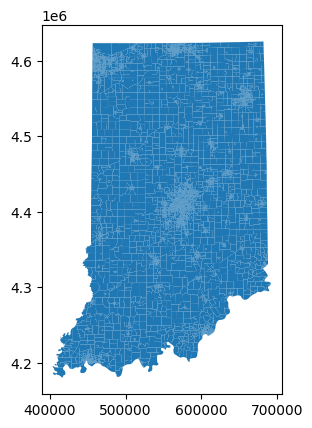

In [25]:
precincts_df.plot()

### Save the file to save time

In [26]:
precincts_df.to_file("./IN/IN.shp")
shp_file = gpd.read_file("./IN/IN.shp")
shp_file.to_file('./IN/IN.geojson', driver='GeoJSON')